# Tech Layoffs Data Analysis (2020–2024)
* A Data Analytics Project using Python & Power BI 
* This project explores global layoffs across various companies and industries between 2020 and 2024. We aim to identify key trends, affected sectors, and generate actionable business insights using Python for data cleaning and Power BI for dashboarding.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np 
import seaborn as sns

### 📥 Load the Dataset

* Loading the Excel file containing the tech layoffs dataset using `pandas`.



In [2]:
 df = pd.read_excel(r'E:/tech_layoffs_data_analysis/tech_layoffs.xlsx')

### 📄 Preview the Dataset

Let's display the dataset to understand its structure, number of columns, and a sample of the data entries.


In [3]:
df

,#,Company,Location_HQ,Country,Continent,Laid_Off,Date_layoffs,Percentage,Company_Size_before_Layoffs,Company_Size_after_layoffs,Industry,Stage,Money_Raised_in_$_mil,Year,lat,lng
0,3,ShareChat,Bengaluru,India,Asia,200.0,2023-12-20,15.0,1333.0,1133.0,Consumer,Series H,$1700,2023,12.971940,77.593690
1,4,InSightec,Haifa,Israel,Asia,100.0,2023-12-19,20.0,500.0,400.0,Healthcare,Unknown,$733,2023,32.818410,34.988500
2,6,Enphase Energy,San Francisco Bay Area,USA,North America,350.0,2023-12-18,10.0,3500.0,3150.0,Energy,Post-IPO,$116,2023,37.548270,-121.988570
3,7,Udaan,Bengaluru,India,Asia,100.0,2023-12-18,10.0,1000.0,900.0,Retail,Unknown,NaN,2023,12.971940,77.593690
4,14,Cruise,San Francisco Bay Area,USA,North America,900.0,2023-12-14,24.0,3750.0,2850.0,Transportation,Acquired,$15000,2023,37.774930,-122.419420
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1667,3533,TomTom,Lodz,Poland,Europe,45.0,2023-12-12,NaN,NaN,NaN,Transport…,Post-IPO,NaN,2024,51.768732,19.456991
1668,3534,Chipper Cash,San Francisco Bay Area,USA,North America,15.0,2023-12-11,33.0,45.0,30.0,Finance,Series C,$302,2024,37.774930,-122.419420
1669,3535,Jungle Scout,Austin,USA,North America,NaN,2023-12-09,NaN,NaN,NaN,Retail,Private …,$110,2024,30.267150,-97.743060
1670,3536,SmileDirectClub,Nashville,USA,North America,NaN,2023-12-09,100.0,NaN,0.0,Healthcare,Post-IPO,$694,2024,36.165890,-86.784440


### 🔍 First Look at the Data

Displaying the first 5 rows of the dataset using `df.head()` to get an initial understanding of the available columns and sample data.



In [4]:
df.head()

,#,Company,Location_HQ,Country,Continent,Laid_Off,Date_layoffs,Percentage,Company_Size_before_Layoffs,Company_Size_after_layoffs,Industry,Stage,Money_Raised_in_$_mil,Year,lat,lng
0,3,ShareChat,Bengaluru,India,Asia,200.0,2023-12-20,15.0,1333.0,1133.0,Consumer,Series H,$1700,2023,12.97194,77.59369
1,4,InSightec,Haifa,Israel,Asia,100.0,2023-12-19,20.0,500.0,400.0,Healthcare,Unknown,$733,2023,32.81841,34.98850
2,6,Enphase Energy,San Francisco Bay Area,USA,North America,350.0,2023-12-18,10.0,3500.0,3150.0,Energy,Post-IPO,$116,2023,37.54827,-121.98857
3,7,Udaan,Bengaluru,India,Asia,100.0,2023-12-18,10.0,1000.0,900.0,Retail,Unknown,NaN,2023,12.97194,77.59369
4,14,Cruise,San Francisco Bay Area,USA,North America,900.0,2023-12-14,24.0,3750.0,2850.0,Transportation,Acquired,$15000,2023,37.77493,-122.41942


###  View the Last Few Rows

Using `df.tail()` to display the last 5 rows of the dataset. This helps identify any irregularities or incomplete entries at the end of the dataset.


In [5]:
df.tail()

,#,Company,Location_HQ,Country,Continent,Laid_Off,Date_layoffs,Percentage,Company_Size_before_Layoffs,Company_Size_after_layoffs,Industry,Stage,Money_Raised_in_$_mil,Year,lat,lng
1667,3533,TomTom,Lodz,Poland,Europe,45.0,2023-12-12,NaN,NaN,NaN,Transport…,Post-IPO,NaN,2024,51.768732,19.456991
1668,3534,Chipper Cash,San Francisco Bay Area,USA,North America,15.0,2023-12-11,33.0,45.0,30.0,Finance,Series C,$302,2024,37.774930,-122.419420
1669,3535,Jungle Scout,Austin,USA,North America,NaN,2023-12-09,NaN,NaN,NaN,Retail,Private …,$110,2024,30.267150,-97.743060
1670,3536,SmileDirectClub,Nashville,USA,North America,NaN,2023-12-09,100.0,NaN,0.0,Healthcare,Post-IPO,$694,2024,36.165890,-86.784440
1671,3537,Sunfolding,San Francisco Bay Area,USA,North America,NaN,2023-12-09,100.0,NaN,0.0,Energy,Series B,$32,2024,37.774930,-122.419420


### ℹ️ Dataset Information

Using `df.info()` to check the structure of the dataset. This includes the number of entries, column names, data types, and missing values, which helps guide the data cleaning process.


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1672 entries, 0 to 1671
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   #                            1672 non-null   int64         
 1   Company                      1672 non-null   object        
 2   Location_HQ                  1672 non-null   object        
 3   Country                      1672 non-null   object        
 4   Continent                    1672 non-null   object        
 5   Laid_Off                     1565 non-null   float64       
 6   Date_layoffs                 1672 non-null   datetime64[ns]
 7   Percentage                   1570 non-null   float64       
 8   Company_Size_before_Layoffs  1511 non-null   float64       
 9   Company_Size_after_layoffs   1536 non-null   float64       
 10  Industry                     1672 non-null   object        
 11  Stage                        1672 non-null 

### 🧹 Drop Unnecessary Columns

Removing the `#` column from the dataset as it does not add analytical value.


In [7]:
df.drop(columns='#',inplace=True)

In [8]:
df

,Company,Location_HQ,Country,Continent,Laid_Off,Date_layoffs,Percentage,Company_Size_before_Layoffs,Company_Size_after_layoffs,Industry,Stage,Money_Raised_in_$_mil,Year,lat,lng
0,ShareChat,Bengaluru,India,Asia,200.0,2023-12-20,15.0,1333.0,1133.0,Consumer,Series H,$1700,2023,12.971940,77.593690
1,InSightec,Haifa,Israel,Asia,100.0,2023-12-19,20.0,500.0,400.0,Healthcare,Unknown,$733,2023,32.818410,34.988500
2,Enphase Energy,San Francisco Bay Area,USA,North America,350.0,2023-12-18,10.0,3500.0,3150.0,Energy,Post-IPO,$116,2023,37.548270,-121.988570
3,Udaan,Bengaluru,India,Asia,100.0,2023-12-18,10.0,1000.0,900.0,Retail,Unknown,NaN,2023,12.971940,77.593690
4,Cruise,San Francisco Bay Area,USA,North America,900.0,2023-12-14,24.0,3750.0,2850.0,Transportation,Acquired,$15000,2023,37.774930,-122.419420
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1667,TomTom,Lodz,Poland,Europe,45.0,2023-12-12,NaN,NaN,NaN,Transport…,Post-IPO,NaN,2024,51.768732,19.456991
1668,Chipper Cash,San Francisco Bay Area,USA,North America,15.0,2023-12-11,33.0,45.0,30.0,Finance,Series C,$302,2024,37.774930,-122.419420
1669,Jungle Scout,Austin,USA,North America,NaN,2023-12-09,NaN,NaN,NaN,Retail,Private …,$110,2024,30.267150,-97.743060
1670,SmileDirectClub,Nashville,USA,North America,NaN,2023-12-09,100.0,NaN,0.0,Healthcare,Post-IPO,$694,2024,36.165890,-86.784440


### 🔁 Check for Duplicate Rows

Identifying how many duplicate rows exist in the dataset using `df.duplicated().sum()`. Removing duplicates ensures data integrity and avoids skewed analysis.


In [9]:
df.duplicated().sum()

np.int64(1)

### 🔎 Display Duplicate Rows

Listing all duplicate rows in the dataset using `df[df.duplicated()]` to inspect the repeated entries before removal.


In [10]:
df[df.duplicated()]

,Company,Location_HQ,Country,Continent,Laid_Off,Date_layoffs,Percentage,Company_Size_before_Layoffs,Company_Size_after_layoffs,Industry,Stage,Money_Raised_in_$_mil,Year,lat,lng
667,Beyond Meat,Los Angeles,USA,North America,200.0,2022-10-14,19.0,1053.0,853.0,Food,Post-IPO,$122,2022,34.05223,-118.24368


### 🧾 Show All Duplicate Instances

Using `df[df.duplicated(keep=False)]` to display all instances of duplicate rows (including the original ones), which helps in thoroughly inspecting repeated records before removal.


In [11]:
df[df.duplicated(keep=False)]


,Company,Location_HQ,Country,Continent,Laid_Off,Date_layoffs,Percentage,Company_Size_before_Layoffs,Company_Size_after_layoffs,Industry,Stage,Money_Raised_in_$_mil,Year,lat,lng
666,Beyond Meat,Los Angeles,USA,North America,200.0,2022-10-14,19.0,1053.0,853.0,Food,Post-IPO,$122,2022,34.05223,-118.24368
667,Beyond Meat,Los Angeles,USA,North America,200.0,2022-10-14,19.0,1053.0,853.0,Food,Post-IPO,$122,2022,34.05223,-118.24368


### 🗑️ Remove Duplicate Rows

Dropping all duplicate rows from the dataset using `df.drop_duplicates(inplace=True)` to ensure each record is unique and the analysis is not skewed.


In [12]:
df.drop_duplicates(inplace=True)

In [13]:
df

,Company,Location_HQ,Country,Continent,Laid_Off,Date_layoffs,Percentage,Company_Size_before_Layoffs,Company_Size_after_layoffs,Industry,Stage,Money_Raised_in_$_mil,Year,lat,lng
0,ShareChat,Bengaluru,India,Asia,200.0,2023-12-20,15.0,1333.0,1133.0,Consumer,Series H,$1700,2023,12.971940,77.593690
1,InSightec,Haifa,Israel,Asia,100.0,2023-12-19,20.0,500.0,400.0,Healthcare,Unknown,$733,2023,32.818410,34.988500
2,Enphase Energy,San Francisco Bay Area,USA,North America,350.0,2023-12-18,10.0,3500.0,3150.0,Energy,Post-IPO,$116,2023,37.548270,-121.988570
3,Udaan,Bengaluru,India,Asia,100.0,2023-12-18,10.0,1000.0,900.0,Retail,Unknown,NaN,2023,12.971940,77.593690
4,Cruise,San Francisco Bay Area,USA,North America,900.0,2023-12-14,24.0,3750.0,2850.0,Transportation,Acquired,$15000,2023,37.774930,-122.419420
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1667,TomTom,Lodz,Poland,Europe,45.0,2023-12-12,NaN,NaN,NaN,Transport…,Post-IPO,NaN,2024,51.768732,19.456991
1668,Chipper Cash,San Francisco Bay Area,USA,North America,15.0,2023-12-11,33.0,45.0,30.0,Finance,Series C,$302,2024,37.774930,-122.419420
1669,Jungle Scout,Austin,USA,North America,NaN,2023-12-09,NaN,NaN,NaN,Retail,Private …,$110,2024,30.267150,-97.743060
1670,SmileDirectClub,Nashville,USA,North America,NaN,2023-12-09,100.0,NaN,0.0,Healthcare,Post-IPO,$694,2024,36.165890,-86.784440


### 💰 Explore Unique Values in 'Money_Raised_in_$_mil'

Printing unique values from the `Money_Raised_in_$_mil` column to identify potential inconsistencies, non-numeric entries, or missing values that may require data cleaning.


In [14]:
print(df['Money_Raised_in_$_mil'].unique())

['$1700' '$733' '$116' nan '$15000' '$1300' '$97' '$302' '$194' '$120'
 '$35' '$2100' '$52' '$700' '$1100' '$390' '$100' '$3' '$366' '$122'
 '$2400' '$106' '$365' '$218' '$32' '$16' '$705' '$64' '$154' '$537'
 '$392' '$272' '$86' '$522' '$54' '$8' '$629' '$400' '$730' '$536' '$50'
 '$70' '$123' '$137' '$458' '$263' '$170' '$131' '$1400' '$456' '$224'
 '$389' '$71' '$296' '$468' '$94' '$107' '$208' '$238' '$40' '$149' '$10'
 '$14' '$217' '$1' '$4' '$220' '$192' '$1800' '$157' '$30' '$111' '$83'
 '$665' '$2' '$748' '$89' '$82' '$234' '$513' '$435' '$567' '$274' '$105'
 '$110' '$574' '$57' '$12' '$188' '$46' '$39' '$1600' '$569' '$103'
 '$1500' '$351' '$322' '$179' '$316' '$33' '$91' '$256' '$20' '$118'
 '$363' '$409' '$17' '$711' '$156' '$896' '$216' '$65' '$81' '$214'
 '$5600' '$25200' '$134' '$16500' '$88' '$24' '$51' '$84' '$455' '$340'
 '$184' '$284' '$529' '$469' '$227' '$253' '$288' '$891' '$644' '$462'
 '$165' '$364' '$7' '$394' '$85' '$769' '$173' '$181' '$330' '$817' '$643'
 '$1

### 🧼 Clean and Convert 'Money_Raised_in_$_mil' Column

The `Money_Raised_in_$_mil` column contains inconsistent formats (like `$`, `M`, or commas). We perform the following cleaning steps:
- Convert all entries to strings and remove commas.
- Remove any non-numeric characters using regex.
- Convert the cleaned strings to numeric values (floats).
- Handle missing or invalid values by replacing them with the column's median.

This ensures the column is ready for accurate analysis and visualization.


In [15]:
df['Money_Raised_in_$_mil'] = (
    df['Money_Raised_in_$_mil']
    .astype(str)
    .str.replace(',', '', regex=False)
    .str.replace(r'[^\d.]', '', regex=True)
)

df['Money_Raised_in_$_mil'] = pd.to_numeric(df['Money_Raised_in_$_mil'], errors='coerce')

# Fill missing values with median
median_val = df['Money_Raised_in_$_mil'].median()
df['Money_Raised_in_$_mil']=df['Money_Raised_in_$_mil'].fillna(median_val)


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1671 entries, 0 to 1671
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Company                      1671 non-null   object        
 1   Location_HQ                  1671 non-null   object        
 2   Country                      1671 non-null   object        
 3   Continent                    1671 non-null   object        
 4   Laid_Off                     1564 non-null   float64       
 5   Date_layoffs                 1671 non-null   datetime64[ns]
 6   Percentage                   1569 non-null   float64       
 7   Company_Size_before_Layoffs  1510 non-null   float64       
 8   Company_Size_after_layoffs   1535 non-null   float64       
 9   Industry                     1671 non-null   object        
 10  Stage                        1671 non-null   object        
 11  Money_Raised_in_$_mil        1671 non-null   flo

### ✅ Verify Missing Values Post-Cleaning

Checking for any remaining null values in the `Money_Raised_in_$_mil` column after cleaning and filling with the median. This confirms the column is ready for analysis.


In [17]:
print(df['Money_Raised_in_$_mil'].isnull().sum())


0


In [19]:
df.isnull().sum()

Company                          0
Location_HQ                      0
Country                          0
Continent                        0
Laid_Off                       107
Date_layoffs                     0
Percentage                     102
Company_Size_before_Layoffs    161
Company_Size_after_layoffs     136
Industry                         0
Stage                            0
Money_Raised_in_$_mil            0
Year                             0
lat                              0
lng                              0
dtype: int64

### 🔍 Inspect Missing Values in 'Laid_Off' Column

Displaying all rows where the `Laid_Off` column has missing values. This helps in understanding the context of nulls and deciding how to handle or impute them.


In [20]:
df[df['Laid_Off'].isnull()]

,Company,Location_HQ,Country,Continent,Laid_Off,Date_layoffs,Percentage,Company_Size_before_Layoffs,Company_Size_after_layoffs,Industry,Stage,Money_Raised_in_$_mil,Year,lat,lng
1405,Verily,San Francisco Bay Area,USA,North America,NaN,2024-03-22,NaN,NaN,NaN,Healthcare,Subsidi…,3500.0,2024,37.653540,-122.416866
1406,Cybereason,Boston,USA,North America,NaN,2024-03-20,NaN,NaN,NaN,Security,Series F,750.0,2024,42.358430,-71.059770
1409,Airmeet,Bengaluru,India,Asia,NaN,2024-03-19,20.0,NaN,NaN,Marketing,Series B,50.0,2024,12.971940,77.593690
1410,Longi,Xi'an,China,Asia,NaN,2024-03-18,5.0,NaN,NaN,Energy,Unknown,182.0,2024,34.261001,108.942379
1413,Blueboard,San Francisco Bay Area,USA,North America,NaN,2024-03-15,100.0,NaN,0.0,HR,Series A,16.0,2024,37.774930,-122.419420
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1665,FourKites,Chicago,USA,North America,NaN,2023-12-13,15.0,NaN,NaN,Logistics,Unknown,241.0,2024,41.850030,-87.650050
1666,Sojern,San Francisco Bay Area,USA,North America,NaN,2023-12-13,20.0,NaN,NaN,Marketing,Unknown,172.0,2024,37.774930,-122.419420
1669,Jungle Scout,Austin,USA,North America,NaN,2023-12-09,NaN,NaN,NaN,Retail,Private …,110.0,2024,30.267150,-97.743060
1670,SmileDirectClub,Nashville,USA,North America,NaN,2023-12-09,100.0,NaN,0.0,Healthcare,Post-IPO,694.0,2024,36.165890,-86.784440


### 🧹 Remove Rows with Multiple Critical Nulls

Filtering out rows where all of the following columns are null:
- `Laid_Off`
- `Percentage`
- `Company_Size_before_Layoffs`
- `Company_Size_after_layoffs`

These rows provide no useful data for analysis and are removed to improve dataset quality.


In [21]:
condition = (
    df['Laid_Off'].isnull() &                     
    df['Percentage'].isnull() &                    
    df['Company_Size_before_Layoffs'].isnull() &   
    df['Company_Size_after_layoffs'].isnull()      
)

df = df[~condition]


### 🔎 Check Remaining Nulls in 'Laid_Off' Column

After removing rows where all four critical columns (`Laid_Off`, `Percentage`, `Company_Size_before_Layoffs`, `Company_Size_after_layoffs`) were null, 
we still have some entries where only `Laid_Off` is missing but the other related columns contain valid data.

These rows may still hold analytical value, so we are inspecting them before deciding how to handle the missing `Laid_Off` values.


In [22]:
df[df['Laid_Off'].isnull()]

,Company,Location_HQ,Country,Continent,Laid_Off,Date_layoffs,Percentage,Company_Size_before_Layoffs,Company_Size_after_layoffs,Industry,Stage,Money_Raised_in_$_mil,Year,lat,lng
1409,Airmeet,Bengaluru,India,Asia,NaN,2024-03-19,20.0,NaN,NaN,Marketing,Series B,50.0,2024,12.971940,77.593690
1410,Longi,Xi'an,China,Asia,NaN,2024-03-18,5.0,NaN,NaN,Energy,Unknown,182.0,2024,34.261001,108.942379
1413,Blueboard,San Francisco Bay Area,USA,North America,NaN,2024-03-15,100.0,NaN,0.0,HR,Series A,16.0,2024,37.774930,-122.419420
1420,Inscribe,San Francisco Bay Area,USA,North America,NaN,2024-03-08,40.0,NaN,NaN,Finance,Series B,39.0,2024,37.774930,-122.419420
1436,Fisker,Los Angeles,USA,North America,NaN,2024-02-29,15.0,NaN,NaN,Transport…,Post-IPO,1700.0,2024,34.052230,-118.243680
1437,Kevin,Vilnius,Lithuania,Europe,NaN,2024-02-29,14.0,NaN,NaN,Finance,Series A,79.0,2024,54.687046,25.282911
1441,Motional,Boston,USA,North America,NaN,2024-02-28,5.0,NaN,NaN,Transport…,Unknown,182.0,2024,42.358430,-71.059770
1454,BuzzFeed,New York City,USA,North America,NaN,2024-02-21,16.0,NaN,NaN,Media,Post-IPO,696.0,2024,40.714270,-74.005970
1455,Rivian,Detroit,USA,North America,NaN,2024-02-21,10.0,NaN,NaN,Transport…,Post-IPO,10700.0,2024,42.331430,-83.045750
1459,KnownOrigin,Manchester,United Kingdom,Europe,NaN,2024-02-20,30.0,NaN,NaN,Crypto,Acquired,3.0,2024,53.479489,-2.245115


### 🔢 Impute Missing 'Laid_Off' Values Using Percentage and Company Size

For rows where `Laid_Off` is missing but both `Percentage` and `Company_Size_before_Layoffs` are available, we estimate the number of layoffs using the formula in code

This imputation fills in the missing `Laid_Off` values based on logical assumptions from existing data.


In [23]:
mask = (
    df['Laid_Off'].isnull() &
    df['Percentage'].notnull() &
    df['Company_Size_before_Layoffs'].notnull()
)

df.loc[mask, 'Laid_Off'] = (df.loc[mask, 'Percentage'] * df.loc[mask, 'Company_Size_before_Layoffs']) / 100



In [24]:
df[df['Laid_Off'].isnull()]

,Company,Location_HQ,Country,Continent,Laid_Off,Date_layoffs,Percentage,Company_Size_before_Layoffs,Company_Size_after_layoffs,Industry,Stage,Money_Raised_in_$_mil,Year,lat,lng
1409,Airmeet,Bengaluru,India,Asia,NaN,2024-03-19,20.0,NaN,NaN,Marketing,Series B,50.0,2024,12.971940,77.593690
1410,Longi,Xi'an,China,Asia,NaN,2024-03-18,5.0,NaN,NaN,Energy,Unknown,182.0,2024,34.261001,108.942379
1413,Blueboard,San Francisco Bay Area,USA,North America,NaN,2024-03-15,100.0,NaN,0.0,HR,Series A,16.0,2024,37.774930,-122.419420
1420,Inscribe,San Francisco Bay Area,USA,North America,NaN,2024-03-08,40.0,NaN,NaN,Finance,Series B,39.0,2024,37.774930,-122.419420
1436,Fisker,Los Angeles,USA,North America,NaN,2024-02-29,15.0,NaN,NaN,Transport…,Post-IPO,1700.0,2024,34.052230,-118.243680
1437,Kevin,Vilnius,Lithuania,Europe,NaN,2024-02-29,14.0,NaN,NaN,Finance,Series A,79.0,2024,54.687046,25.282911
1441,Motional,Boston,USA,North America,NaN,2024-02-28,5.0,NaN,NaN,Transport…,Unknown,182.0,2024,42.358430,-71.059770
1454,BuzzFeed,New York City,USA,North America,NaN,2024-02-21,16.0,NaN,NaN,Media,Post-IPO,696.0,2024,40.714270,-74.005970
1455,Rivian,Detroit,USA,North America,NaN,2024-02-21,10.0,NaN,NaN,Transport…,Post-IPO,10700.0,2024,42.331430,-83.045750
1459,KnownOrigin,Manchester,United Kingdom,Europe,NaN,2024-02-20,30.0,NaN,NaN,Crypto,Acquired,3.0,2024,53.479489,-2.245115


### 🔍 Remaining Nulls in 'Laid_Off' (Not Imputable)

After estimating missing `Laid_Off` values using `Percentage` and `Company_Size_before_Layoffs`, we still have some rows where `Laid_Off` is null and cannot be calculated due to insufficient information.

These entries lack both the required company size data, making them unfit for estimation. We display them here for final inspection before deciding to drop or handle them differently.


In [25]:
df=df.dropna(subset=['Laid_Off'])


### 📊 Check for Remaining Missing Values

Using `df.isnull().sum()` to get a summary of missing values in each column after completing the data cleaning process.

✅ The `Laid_Off` column no longer contains any null values, as all missing entries were either estimated using available data or removed where estimation wasn't possible.


In [26]:
df.isnull().sum()

Company                         0
Location_HQ                     0
Country                         0
Continent                       0
Laid_Off                        0
Date_layoffs                    0
Percentage                     54
Company_Size_before_Layoffs    54
Company_Size_after_layoffs     53
Industry                        0
Stage                           0
Money_Raised_in_$_mil           0
Year                            0
lat                             0
lng                             0
dtype: int64

### 🧮 Fill Remaining Missing Values with Median

To handle remaining null values in numeric columns, we use the median of each column. Median imputation is less sensitive to outliers compared to the mean.

- **`Percentage`**: Filled with the median percentage value.
- **`Company_Size_before_Layoffs`**: Filled with the median company size before layoffs.
- **`Company_Size_after_layoffs`**: Filled with the median company size after layoffs.

This ensures all key numeric columns are complete and consistent for analysis.


In [27]:
# Fill Percentage
df['Percentage']=df['Percentage'].fillna(df['Percentage'].median())

# Fill Company_Size_before_Layoffs
df['Company_Size_before_Layoffs']=df['Company_Size_before_Layoffs'].fillna(df['Company_Size_before_Layoffs'].median())

# Fill Company_Size_after_layoffs
df['Company_Size_after_layoffs']=df['Company_Size_after_layoffs'].fillna(df['Company_Size_after_layoffs'].median())


### ✅ Final Null Check on Key Columns

We perform a final check to ensure that the essential numerical columns used in calculations and analysis are free of missing values:

- `Laid_Off`
- `Company_Size_before_Layoffs`
- `Percentage`
- `Company_Size_after_layoffs`

All these columns now show **zero null values**, confirming that our imputation and cleaning steps were successful.


In [28]:
df[['Laid_Off', 'Company_Size_before_Layoffs', 'Percentage', 'Company_Size_after_layoffs']].isnull().sum()


Laid_Off                       0
Company_Size_before_Layoffs    0
Percentage                     0
Company_Size_after_layoffs     0
dtype: int64

In [29]:
(df == ' ').sum()


Company                        0
Location_HQ                    0
Country                        0
Continent                      0
Laid_Off                       0
Date_layoffs                   0
Percentage                     0
Company_Size_before_Layoffs    0
Company_Size_after_layoffs     0
Industry                       0
Stage                          0
Money_Raised_in_$_mil          0
Year                           0
lat                            0
lng                            0
dtype: int64

### 🌍 Explore Unique Continents

Checking the unique values present in the `Continent` column to:

- Understand the geographic spread of the data.
- Identify any inconsistencies or misspellings that may need correction.


In [30]:
df['Continent'].unique()

array(['Asia', 'North America', 'Europe', 'Africa', 'South America',
       'Australia'], dtype=object)

### 🏗️ Explore Unique Company Stages

Checking the unique values in the `Stage` column to understand the different stages of company funding or development (e.g., Seed, Series A, IPO, etc.).

This helps identify which business stages are most impacted by layoffs.


In [31]:
df['Stage'].unique()

array(['Series H', 'Unknown', 'Post-IPO', 'Acquired', 'Series E',
       'Series C', 'Series B', 'Series F', 'Series A', 'Series G',
       'Series D', 'Private Equity …', 'Seed', 'Subsidi…', 'Series I',
       'Series J', 'Private …'], dtype=object)

### 🏢 Explore Unique Industries

Displaying the unique values in the `Industry` column to understand the range of sectors represented in the dataset. 

This helps identify which industries are affected by layoffs and also allows us to spot any inconsistencies or overlapping industry names that may require cleaning.


In [32]:
df['Industry'].unique()

array(['Consumer', 'Healthcare', 'Energy', 'Retail', 'Transportation',
       'Finance', 'Product', 'Media', 'Other', 'AI', 'Education',
       'Travel', 'Food', 'Data', 'HR', 'Hardware', 'Logistics', 'Sales',
       'Recruiting', 'Crypto', 'Marketing', 'Real Estate', 'Security',
       'Manufacturing', 'Aerospace', 'Infrastructure', 'Support',
       'Fitness', 'Legal', 'Construction', 'Manufact…', 'Transport…',
       'Infrastruc…'], dtype=object)

### 🧼 Clean and Standardize 'Continent' Column

To ensure consistency in the `Continent` column, we:
- Remove leading/trailing whitespaces using `.str.strip()`
- Convert all entries to title case using `.str.title()`

This standardization is important for accurate grouping and visualization.


In [33]:
df['Continent'] = df['Continent'].str.strip().str.title()


### 🧼 Clean and Standardize 'Industry' Column

To clean up the `Industry` column, we:
- Remove any leading or trailing whitespace using `.str.strip()`
- Convert text to title case using `.str.title()` for consistency

This ensures consistent labeling, which is essential for grouping, filtering, and accurate visualizations.


In [34]:
df['Industry'] = df['Industry'].str.strip().str.title()


### 🧼 Clean and Standardize 'Stage' Column

To ensure consistency in the `Stage` column, we:
- Strip any leading or trailing whitespace using `.str.strip()`
- Convert all entries to title case using `.str.title()`

This prepares the data for reliable grouping and analysis by company funding or development stage.


In [35]:
df['Stage'] = df['Stage'].str.strip().str.title()

In [36]:
df['Stage'].value_counts()


Stage
Post-Ipo            365
Series B            202
Unknown             192
Series C            186
Series D            169
Acquired            100
Series E             99
Series A             91
Series F             53
Seed                 27
Private Equity …     25
Series H             24
Series G             14
Series I              7
Subsidi…              5
Series J              4
Private …             1
Name: count, dtype: int64

### 🔁 Replace Inconsistent Entries in 'Stage' Column

Some entries in the `Stage` column were truncated or inconsistently labeled (e.g., "Private …", "Subsidi…"). We replace them with their full, meaningful labels:

- `'Private …'` → `'Private'`
- `'Private Equity …'` → `'Private Equity'`
- `'Subsidi…'` → `'Subsidiary'`

This ensures consistency and accuracy in stage-based analysis.


In [37]:
df['Stage'] = df['Stage'].replace({
    'Private …': 'Private',
    'Private Equity …': 'Private Equity',
    'Subsidi…': 'Subsidiary'
})


### 🔁 Replace Incomplete Entries in 'Industry' Column

Some values in the `Industry` column are truncated and need to be corrected for accurate analysis. We replace:

- `'Manufact…'` → `'Manufacturing'`
- `'Transport…'` → `'Transportation'`
- `'Infrastruc…'` → `'Infrastructure'`

This step ensures that industry names are complete and standardized for reliable grouping and visualization.


In [38]:
df['Industry'] = df['Industry'].replace({
    'Manufact…': 'Manufacturing',
    'Transport…': 'Transportation',
    'Infrastruc…': 'Infrastructure'
})

### 🔍 Verify Cleaned Industry Values

Displaying the unique values in the `Industry` column to confirm that all previously truncated or inconsistent entries have been correctly replaced and standardized.

This ensures data integrity before proceeding with industry-level analysis or visualization.


In [39]:
df['Industry'].unique()

array(['Consumer', 'Healthcare', 'Energy', 'Retail', 'Transportation',
       'Finance', 'Product', 'Media', 'Other', 'Ai', 'Education',
       'Travel', 'Food', 'Data', 'Hr', 'Hardware', 'Logistics', 'Sales',
       'Recruiting', 'Crypto', 'Marketing', 'Real Estate', 'Security',
       'Manufacturing', 'Aerospace', 'Infrastructure', 'Support',
       'Fitness', 'Legal', 'Construction'], dtype=object)

In [40]:
df['Company'].unique()


array(['ShareChat', 'InSightec', 'Enphase Energy', ..., 'ForgeRock',
       'Flex', 'TomTom'], dtype=object)

### 🧼 Clean Truncated or Incomplete Company Names

Some company names in the dataset appear to be **truncated**, ending with `"..."` or a `"."`, likely due to data entry or formatting issues.

To ensure consistency and accuracy in company-related analysis, we:

- Identify entries that contain `"..."` or end with one or more `"."` using regex.
- Review and clean these entries by either replacing or removing the incomplete names.

This step improves the quality of company-level aggregations and visualizations.


In [41]:
df['Company'].str.contains(r'\.\.\.|\.{1,}$', regex=True).sum()


np.int64(1)

In [42]:
df[df['Company'].str.contains(r'\.\.\.|\.{1,}$', regex=True)]


,Company,Location_HQ,Country,Continent,Laid_Off,Date_layoffs,Percentage,Company_Size_before_Layoffs,Company_Size_after_layoffs,Industry,Stage,Money_Raised_in_$_mil,Year,lat,lng
831,Unstoppable Do.,San Francisco Bay Area,USA,North America,42.0,2022-07-14,25.0,168.0,126.0,Crypto,Series B,7.0,2022,37.77493,-122.41942


In [43]:
df['Company'] = df['Company'].str.replace(r'\.\.\.|\.{1,}$', '', regex=True).str.strip()


In [44]:
df['Company'] = df['Company'].str.strip()


### 🌍 Cleaning Country Data

To ensure consistency in country names and avoid mismatches during grouping or analysis, we performed the following cleaning steps:

- **Stripped extra spaces** using `.str.strip()` to remove any leading/trailing whitespace.
- This helps eliminate duplicate-looking entries caused by inconsistent formatting.

These steps are critical for maintaining data integrity when analyzing layoffs by country or continent.


In [45]:
df['Country'] = df['Country'].str.strip()

In [46]:
df['Country'] = df['Country'].str.replace(r'\.\.\.|\.{1,}$', '', regex=True).str.strip()

In [47]:
df['Country'].unique()

array(['India', 'Israel', 'USA', 'Sweden', 'United Kingdom', 'Canada',
       'France', 'Netherlands', 'Germany', 'Estonia', 'Kenya', 'Brazil',
       'New Zealand', 'Ireland', 'Australia', 'Singapore', 'Chile',
       'Spain', 'South Korea', 'Indonesia', 'Japan', 'China', 'Argentina',
       'Nigeria', 'United Arabian Emirates', 'Denmark', 'Norway',
       'Thailand', 'Senegal', 'Hong Kong', 'Austria', 'Finland',
       'Malaysia', 'Mexico', 'Russia', 'Switzerland', 'Portugal',
       'Poland', 'Cayman Islands', 'Czech Republic'], dtype=object)

In [48]:
df['Location_HQ'] = df['Location_HQ'].str.strip()

In [49]:
df['Year'].unique()

array([2023, 2022, 2021, 2020, 2024])

In [50]:
df.to_csv('cleaned_data.csv', index=False)


### 🧮 Missing Value Percentage Calculation

To understand the extent of missing data in the dataset, we calculated the percentage of missing values for each column using the following formula:

```python
(df.isnull().sum() / len(df)) * 100


In [51]:
(df.isnull().sum() / len(df)) * 100


Company                        0.0
Location_HQ                    0.0
Country                        0.0
Continent                      0.0
Laid_Off                       0.0
Date_layoffs                   0.0
Percentage                     0.0
Company_Size_before_Layoffs    0.0
Company_Size_after_layoffs     0.0
Industry                       0.0
Stage                          0.0
Money_Raised_in_$_mil          0.0
Year                           0.0
lat                            0.0
lng                            0.0
dtype: float64

In [52]:
df.dtypes

Company                                object
Location_HQ                            object
Country                                object
Continent                              object
Laid_Off                              float64
Date_layoffs                   datetime64[ns]
Percentage                            float64
Company_Size_before_Layoffs           float64
Company_Size_after_layoffs            float64
Industry                               object
Stage                                  object
Money_Raised_in_$_mil                 float64
Year                                    int64
lat                                   float64
lng                                   float64
dtype: object

### 🛠️ Feature Engineering

To enhance the dataset and enable deeper analysis, we created new derived features:

1. **Layoff Month and Quarter**
   Extracted the **month** and **quarter** from the `Date_layoffs` column for time-based analysis.
   ```python
   df['Layoff_Month'] = df['Date_layoffs'].dt.month
   df['Layoff_Quarter'] = df['Date_layoffs'].dt.quarter


In [53]:
# 1. Month & Quarter from date
df['Layoff_Month'] = df['Date_layoffs'].dt.month
df['Layoff_Quarter'] = df['Date_layoffs'].dt.quarter

# 2. Funding Status (Yes/No)
df['Funding_Status'] = df['Money_Raised_in_$_mil'].apply(lambda x: 'Yes' if x > 0 else 'No')

# 3. Layoff Severity
def categorize_severity(x):
    if x < 50:
        return 'Mild'
    elif 50 <= x < 200:
        return 'Moderate'
    else:
        return 'Heavy'

df['Layoff_Level'] = df['Laid_Off'].apply(categorize_severity)


### Cleaned Data

In [54]:
df

,Company,Location_HQ,Country,Continent,Laid_Off,Date_layoffs,Percentage,Company_Size_before_Layoffs,Company_Size_after_layoffs,Industry,Stage,Money_Raised_in_$_mil,Year,lat,lng,Layoff_Month,Layoff_Quarter,Funding_Status,Layoff_Level
0,ShareChat,Bengaluru,India,Asia,200.0,2023-12-20,15.0,1333.0,1133.0,Consumer,Series H,1700.0,2023,12.971940,77.593690,12,4,Yes,Heavy
1,InSightec,Haifa,Israel,Asia,100.0,2023-12-19,20.0,500.0,400.0,Healthcare,Unknown,733.0,2023,32.818410,34.988500,12,4,Yes,Moderate
2,Enphase Energy,San Francisco Bay Area,USA,North America,350.0,2023-12-18,10.0,3500.0,3150.0,Energy,Post-Ipo,116.0,2023,37.548270,-121.988570,12,4,Yes,Heavy
3,Udaan,Bengaluru,India,Asia,100.0,2023-12-18,10.0,1000.0,900.0,Retail,Unknown,182.0,2023,12.971940,77.593690,12,4,Yes,Moderate
4,Cruise,San Francisco Bay Area,USA,North America,900.0,2023-12-14,24.0,3750.0,2850.0,Transportation,Acquired,15000.0,2023,37.774930,-122.419420,12,4,Yes,Heavy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1662,Analog Devices,San Francisco Bay Area,USA,North America,111.0,2023-12-13,15.0,551.5,450.0,Manufacturing,Post-Ipo,182.0,2024,37.336166,-121.890591,12,4,Yes,Moderate
1663,ForgeRock,San Francisco Bay Area,USA,North America,109.0,2023-12-13,15.0,551.5,450.0,Other,Acquired,234.0,2024,37.774930,-122.419420,12,4,Yes,Moderate
1664,Flex,San Francisco Bay Area,USA,North America,31.0,2023-12-13,15.0,551.5,450.0,Manufacturing,Unknown,182.0,2024,37.774930,-122.419420,12,4,Yes,Mild
1667,TomTom,Lodz,Poland,Europe,45.0,2023-12-12,15.0,551.5,450.0,Transportation,Post-Ipo,182.0,2024,51.768732,19.456991,12,4,Yes,Mild


In [55]:
df.to_csv(r'E:\Data Analytics\cleaned_data.csv', index=False)


# Exploratory Data Analysis (EDA)

### 📊 Top 10 Companies by Total Layoffs

We identified the companies with the highest number of total layoffs. This helps highlight which organizations were most impacted or made significant workforce reductions.


<Axes: title={'center': 'Top 10 Companies by layoffs'}, xlabel='Company'>

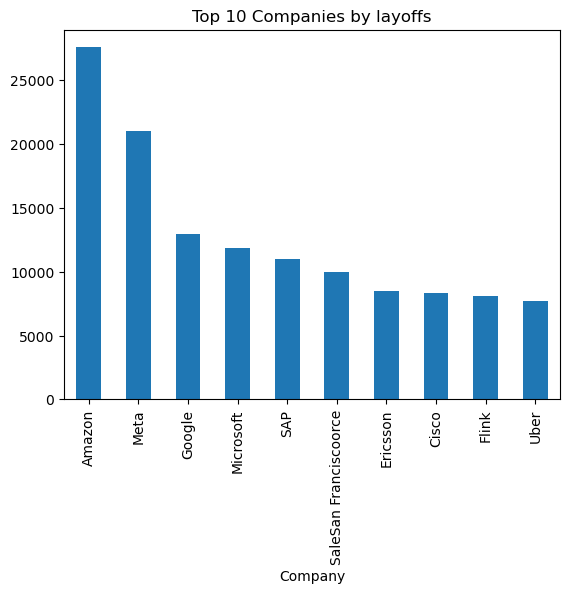

In [56]:
df.groupby('Company')['Laid_Off'].sum().sort_values(ascending=False).head(10).plot(kind='bar',title='Top 10 Companies by layoffs')

### 📉 Total Layoffs Per Year

This line chart illustrates the **annual trend** in layoffs over the dataset's timeframe.

- **X-axis**: Year 
- **Y-axis**: Total number of employees laid off each year.

#### 🔍 Key Insights:
- Helps identify **peak years** of layoffs, potentially tied to economic recessions, global crises  or tech industry contractions.
- Useful in analyzing **year-over-year growth or decline** in layoff activity.



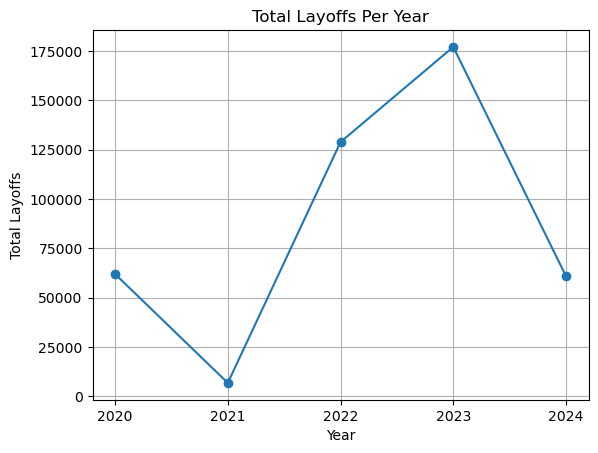

In [57]:
import matplotlib.pyplot as plt

df.groupby(df['Year'].astype(int))['Laid_Off'].sum().plot(kind='line', marker='o', title='Total Layoffs Per Year')
plt.xticks(df['Year'].astype(int).unique())  # Force integer x-axis
plt.xlabel('Year')
plt.ylabel('Total Layoffs')
plt.grid(True)
plt.show()



### 🔝 Top 10 Affected Industries

This chart shows the industries with the highest total layoffs.

- **Chart Type**: Horizontal bar
- **Insight**: Highlights which sectors faced the most layoffs.
- Useful for identifying the most impacted industries during the layoff period.


<Axes: title={'center': 'Top 10 Affected Industries'}, ylabel='Industry'>

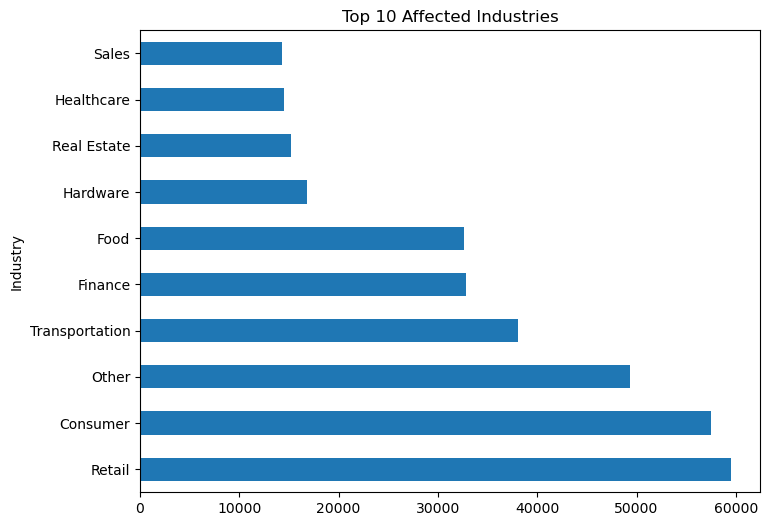

In [58]:
df.groupby('Industry')['Laid_Off'].sum().sort_values(ascending=False).head(10).plot(kind='barh',title='Top 10 Affected Industries', figsize=(8,6))

### 🌍 Top 10 Countries by Layoffs

This bar chart displays the countries with the highest number of layoffs.

- **Chart Type**: Vertical bar
- **Insight**: Shows which countries experienced the most job losses.
- Helps understand geographical impact of layoffs.


<Axes: title={'center': 'Layoffs by Country'}, xlabel='Country'>

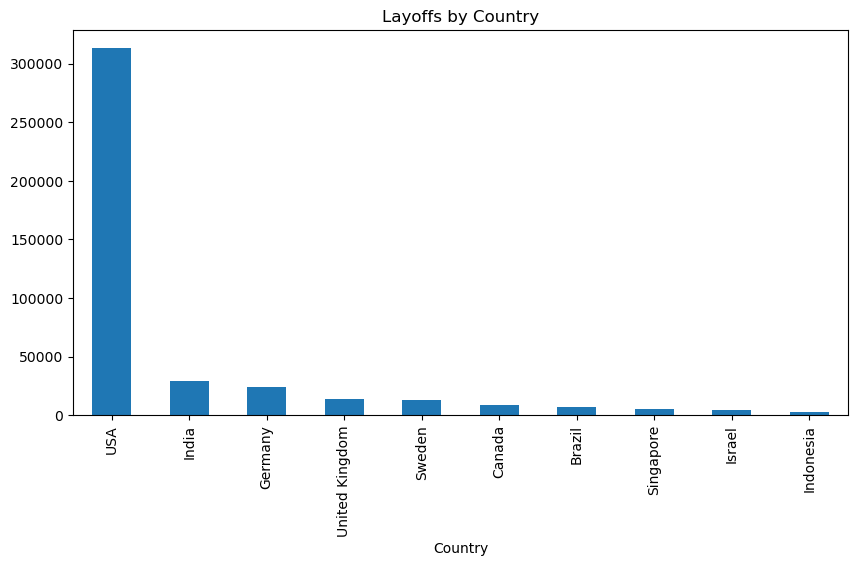

In [59]:
df.groupby('Country')['Laid_Off'].sum().sort_values(ascending=False).head(10).plot(kind='bar', title='Layoffs by Country', figsize=(10,5))

### 💼 Layoffs by Funding Stage

This bar chart illustrates the total number of layoffs categorized by the **company's funding stage** (e.g., Private, Public, Seed, etc.).

- **Chart Type**: Vertical bar
- **Purpose**: Identify which business stages saw the most layoffs.
- **Insight**: Can highlight economic pressure points across funding maturity levels.


<Axes: title={'center': 'Layoffs by Funding Stage'}, xlabel='Stage'>

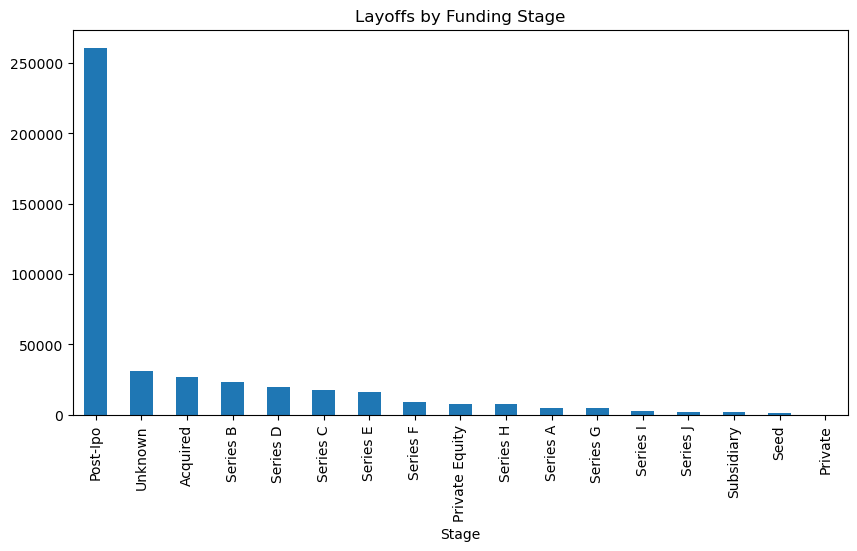

In [60]:
df.groupby('Stage')['Laid_Off'].sum().sort_values(ascending=False).plot(kind='bar', figsize=(10,5), title='Layoffs by Funding Stage')


### 🌍 Yearly Layoffs by Continent

This line chart shows the **total number of layoffs each year, broken down by continent**.

- **X-axis**: Years (
- **Y-axis**: Total layoffs
- **Color Lines**: Represent different continents
- **Purpose**: Understand **geographic trends** in layoffs over time.

🔍 **Insight**: Helps identify which regions were most affected in which years.


<function matplotlib.pyplot.show(close=None, block=None)>

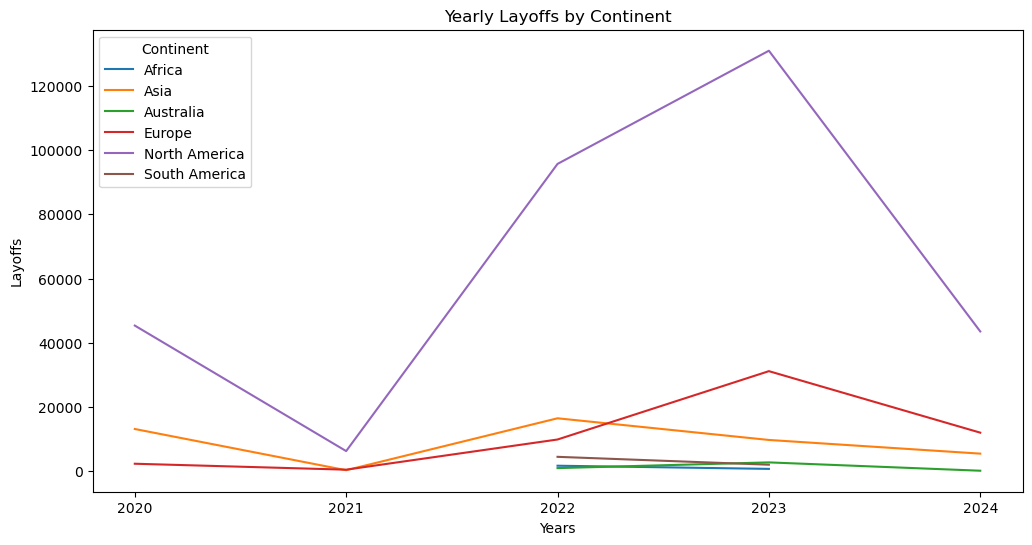

In [61]:
df.groupby(['Year', 'Continent'])['Laid_Off'].sum().unstack().plot(figsize=(12,6), title='Yearly Layoffs by Continent')
plt.xticks(sorted(df['Year'].astype(int).unique()))
plt.xlabel('Years')
plt.ylabel('Layoffs')
plt.show


### 📅 Monthly Layoff Trend

This line chart visualizes the **total number of layoffs across months** (aggregated over all years).

- **X-axis**: Months 
- **Y-axis**: Total layoffs
- **Markers**: Circular markers highlight values for each month
- **Grid**: Enhances visibility for trend comparison

🔍 **Insight**: Useful for spotting **seasonal layoff patterns**, such as higher layoffs in specific months.


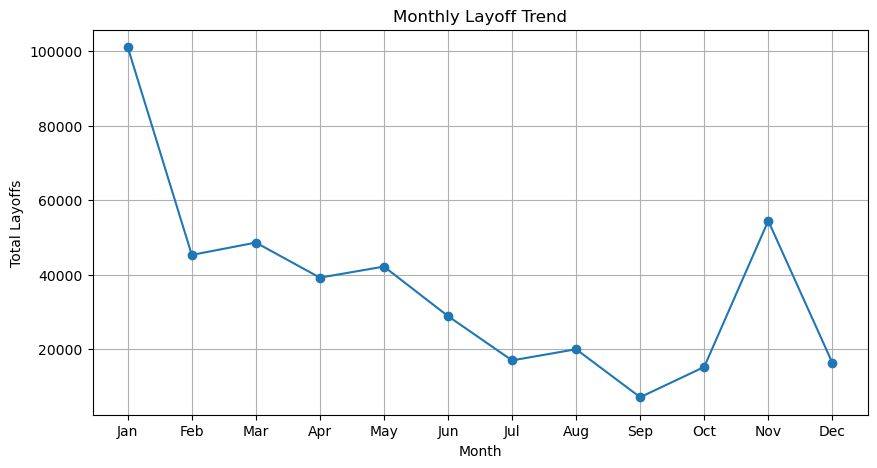

In [62]:
import calendar

monthly_layoffs = df.groupby('Layoff_Month')['Laid_Off'].sum()
monthly_layoffs.index = monthly_layoffs.index.map(lambda x: calendar.month_abbr[x])
plt.xticks(ticks=range(0, 13))
monthly_layoffs.plot(kind='line', marker='o', figsize=(10, 5), title='Monthly Layoff Trend')
plt.xlabel('Month')
plt.ylabel('Total Layoffs')
plt.grid(True)
plt.show()


### 🏢 Average Company Size Before vs After Layoffs

This bar chart compares the **average size of companies**:

- **Before layoffs**
- **After layoffs**

📊 It helps visualize the **impact of layoffs** on company size, indicating whether the workforce reduced significantly on average post-layoff.

- A notable difference suggests **substantial organizational downsizing**.


<Axes: title={'center': 'Avg Company Size Before vs After Layoffs'}>

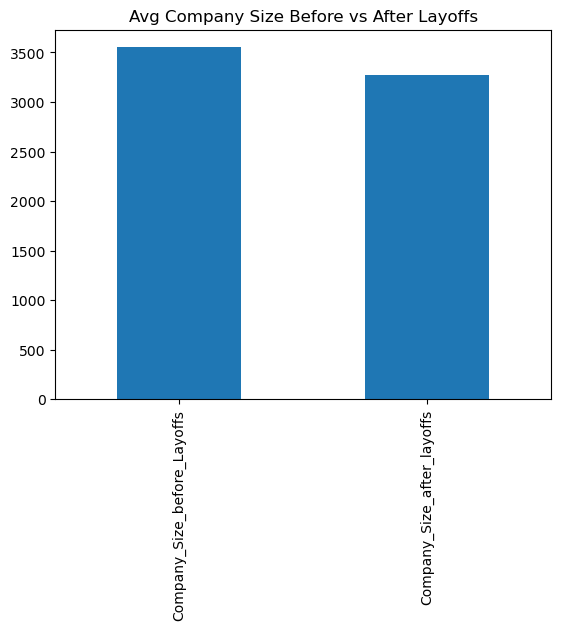

In [63]:
df[['Company_Size_before_Layoffs', 'Company_Size_after_layoffs']].mean().plot(kind='bar', title='Avg Company Size Before vs After Layoffs')


### 🔟 Top 10 Companies by Layoff Percentage

This horizontal bar chart displays the **top 10 companies** with the **highest layoff percentages** (i.e., the proportion of their workforce laid off).



<Axes: title={'center': 'Top 10 Companies by Layoff %'}, ylabel='Company'>

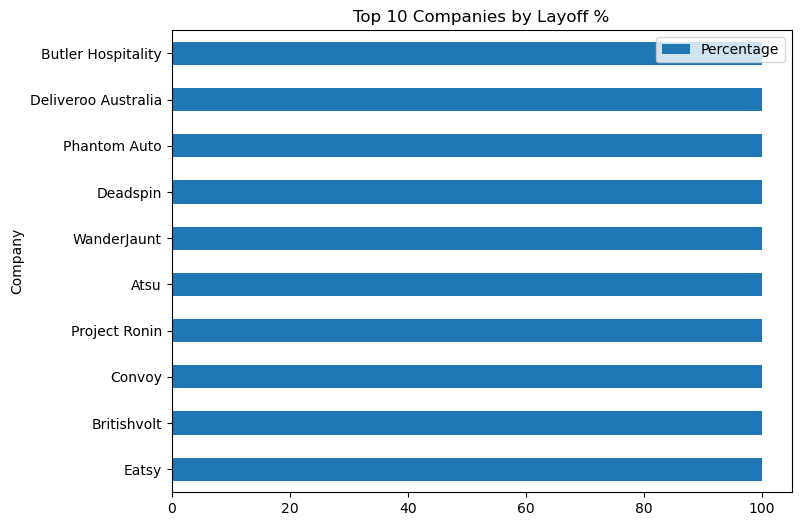

In [64]:
df[['Company', 'Percentage']].sort_values(by='Percentage', ascending=False).drop_duplicates('Company').head(10).set_index('Company').plot(kind='barh', title='Top 10 Companies by Layoff %', figsize=(8,6))


### 📊 Layoffs by Year and Quarter

This grouped bar chart breaks down **total layoffs by year and quarter**, helping to visualize:

- **Seasonal trends** or recurring patterns in layoffs across different quarters.
- **Peak quarters** where layoffs were consistently high.
- How economic conditions may have influenced layoffs at **different points in each year**.




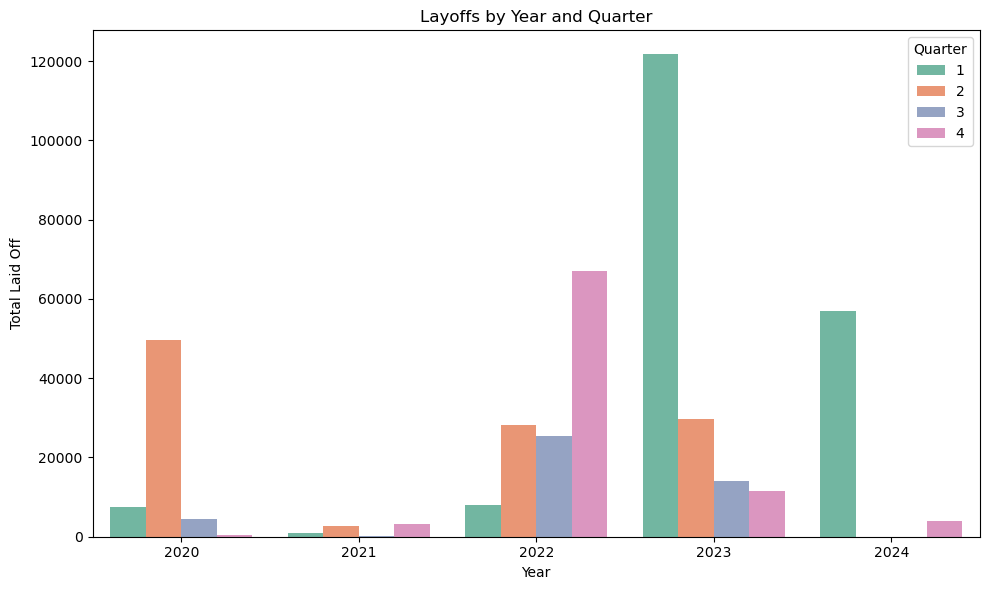

In [65]:
layoffs_by_year_quarter = df.groupby(['Year', 'Layoff_Quarter'])['Laid_Off'].sum().reset_index()
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.barplot(
    data=layoffs_by_year_quarter,
    x='Year',
    y='Laid_Off',
    hue='Layoff_Quarter',
    palette='Set2'
)

plt.title('Layoffs by Year and Quarter')
plt.ylabel('Total Laid Off')
plt.xlabel('Year')
plt.legend(title='Quarter')
plt.tight_layout()
plt.show()



### 💾 Exporting Cleaned Dataset

The final cleaned dataset was exported to a CSV file for further use and dashboarding:


In [66]:
 
df.to_csv("E:/tech_layoffs_data_analysis/Clean_Layoffs_Data.csv", index=False)
